In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\rashi\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rashi\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("Mall_customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=data.iloc[:,[3,4]]
#here first argument of iloc is no. of rows which is all in here and second argument is no. of columns
# this happen in dataframe as well as in NUMPY ARRAYS not in lists

In [5]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Spending Score')

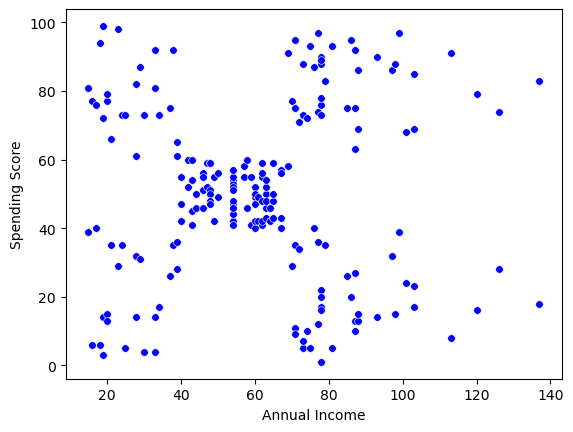

In [9]:
import seaborn as sns
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],c="blue",s=30)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

<AxesSubplot:>

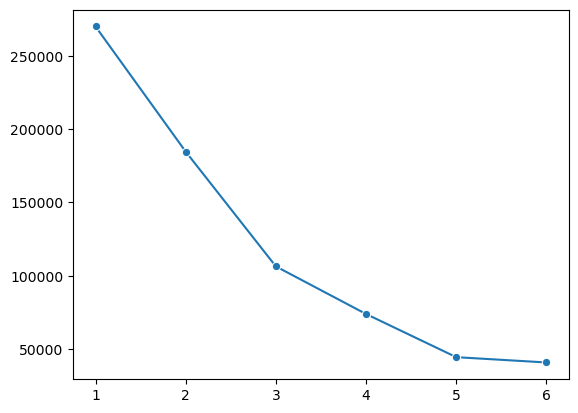

In [10]:
from sklearn.cluster import KMeans
inertia=[]
clusters=[]
for x in range(1,7):
    kmeans=KMeans(n_clusters=x)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    clusters.append(x)
sns.lineplot(x=clusters,y=inertia,marker="o",linestyle="-")
#plt.plot(clusters,inertia,"o-")
    

In [31]:
from sklearn.cluster import DBSCAN
#here eps represent the readius of the circle and min_sample represents the min data point should be present under that radius to make the point as core poitn
dbscan=DBSCAN(eps=5,min_samples=6)
labels=dbscan.fit_predict(df)
np.unique(labels)

array([-1,  0,  1,  2,  3], dtype=int64)

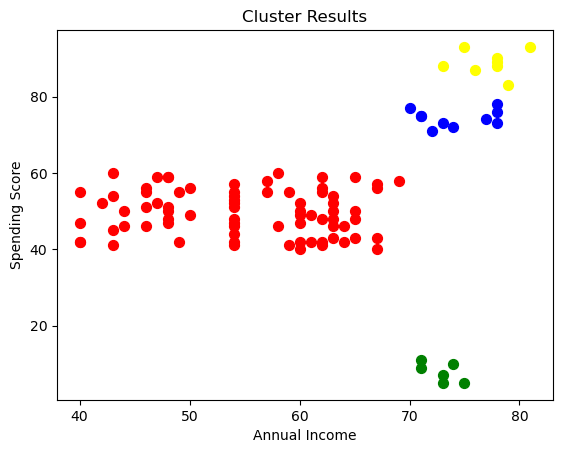

In [39]:
plt.scatter(df.iloc[labels==0,0], df.iloc[labels==0,1], s=50, c= "red")
plt.scatter(df.iloc[labels==1,0], df.iloc[labels==1,1], s=50, c= "blue")
plt.scatter(df.iloc[labels==2,0], df.iloc[labels==2,1], s=50, c= "green")
plt.scatter(df.iloc[labels==3,0], df.iloc[labels==3,1], s=50, c= "yellow")
plt.scatter(df.iloc[labels==4,0], df.iloc[labels==4,1], s=50, c= "brown")
plt.title("Cluster Results")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [37]:
type(kmeans.cluster_centers_)

numpy.ndarray

In [42]:
dbscan.get_params

<bound method BaseEstimator.get_params of DBSCAN(eps=5, min_samples=6)>